**Dataset Used:** [Click to download](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/data/pizza_steak_sushi.zip)

In [50]:
import torch
import torchvision
import matplotlib.pyplot as plt

In [51]:
# Load a pre-trained ResNet18
model = torchvision.models.resnet18(pretrained=True)

c:\Program Files\Python312\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [52]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [53]:
model = model.to(device)

In [54]:
from torchinfo import summary

summary(
  model,
  input_size=(1, 3, 224, 224),
  col_names=["input_size", "output_size", "num_params", "trainable"],
  col_width=20,
  row_settings=["var_names"],
  verbose=1,
  device=device.type
)

Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
ResNet (ResNet)                          [1, 3, 224, 224]     [1, 1000]            --                   True
├─Conv2d (conv1)                         [1, 3, 224, 224]     [1, 64, 112, 112]    9,408                True
├─BatchNorm2d (bn1)                      [1, 64, 112, 112]    [1, 64, 112, 112]    128                  True
├─ReLU (relu)                            [1, 64, 112, 112]    [1, 64, 112, 112]    --                   --
├─MaxPool2d (maxpool)                    [1, 64, 112, 112]    [1, 64, 56, 56]      --                   --
├─Sequential (layer1)                    [1, 64, 56, 56]      [1, 64, 56, 56]      --                   True
│    └─BasicBlock (0)                    [1, 64, 56, 56]      [1, 64, 56, 56]      --                   True
│    │    └─Conv2d (conv1)               [1, 64, 56, 56]      [1, 64, 56, 56]      36,864               True
│    │    └─BatchN

Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
ResNet (ResNet)                          [1, 3, 224, 224]     [1, 1000]            --                   True
├─Conv2d (conv1)                         [1, 3, 224, 224]     [1, 64, 112, 112]    9,408                True
├─BatchNorm2d (bn1)                      [1, 64, 112, 112]    [1, 64, 112, 112]    128                  True
├─ReLU (relu)                            [1, 64, 112, 112]    [1, 64, 112, 112]    --                   --
├─MaxPool2d (maxpool)                    [1, 64, 112, 112]    [1, 64, 56, 56]      --                   --
├─Sequential (layer1)                    [1, 64, 56, 56]      [1, 64, 56, 56]      --                   True
│    └─BasicBlock (0)                    [1, 64, 56, 56]      [1, 64, 56, 56]      --                   True
│    │    └─Conv2d (conv1)               [1, 64, 56, 56]      [1, 64, 56, 56]      36,864               True
│    │    └─BatchN

In [55]:
# Get the loaded model applied transforms
model_transforms = torchvision.models.ResNet18_Weights.DEFAULT.transforms()
model_transforms

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)

In [56]:
train_dataset = torchvision.datasets.ImageFolder(
  root='data/train',
  transform=model_transforms,
  target_transform=None
)

test_dataset = torchvision.datasets.ImageFolder(
  root='data/test',
  transform=model_transforms,
  target_transform=None
)

train_dataset, test_dataset

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/train
     StandardTransform
 Transform: ImageClassification(
                crop_size=[224]
                resize_size=[256]
                mean=[0.485, 0.456, 0.406]
                std=[0.229, 0.224, 0.225]
                interpolation=InterpolationMode.BILINEAR
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/test
     StandardTransform
 Transform: ImageClassification(
                crop_size=[224]
                resize_size=[256]
                mean=[0.485, 0.456, 0.406]
                std=[0.229, 0.224, 0.225]
                interpolation=InterpolationMode.BILINEAR
            ))

In [57]:
from os import cpu_count

train_dl = torch.utils.data.DataLoader(
  train_dataset,
  batch_size=32,
  shuffle=True,
  num_workers=cpu_count(),
  pin_memory=True
)

test_dl = torch.utils.data.DataLoader(
  test_dataset,
  batch_size=32,
  shuffle=False,
  num_workers=cpu_count(),
  pin_memory=True
)

train_dl, test_dl

(<torch.utils.data.dataloader.DataLoader at 0x1ce1543f7d0>,
 <torch.utils.data.dataloader.DataLoader at 0x1ce15187c80>)

In [58]:
list(train_dl)[0][0].shape

torch.Size([32, 3, 224, 224])

In [59]:
for param in model.parameters():
  param.requires_grad = False

In [60]:
train_dataset.classes

['pizza', 'steak', 'sushi']

In [61]:
model.fc

Linear(in_features=512, out_features=1000, bias=True)

In [62]:
num_features = model.fc.in_features
num_features

512

In [63]:
# Replace the final layer (fully connected) of ResNet18
model.fc = torch.nn.Linear(num_features, len(train_dataset.classes))  # 3 classes
model.fc

Linear(in_features=512, out_features=3, bias=True)

In [64]:
summary(
  model,
  input_size=(1, 3, 224, 224),
  col_names=["input_size", "output_size", "num_params", "trainable"],
  col_width=20,
  row_settings=["var_names"],
  verbose=1,
  device=device.type
)

Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
ResNet (ResNet)                          [1, 3, 224, 224]     [1, 3]               --                   Partial
├─Conv2d (conv1)                         [1, 3, 224, 224]     [1, 64, 112, 112]    (9,408)              False
├─BatchNorm2d (bn1)                      [1, 64, 112, 112]    [1, 64, 112, 112]    (128)                False
├─ReLU (relu)                            [1, 64, 112, 112]    [1, 64, 112, 112]    --                   --
├─MaxPool2d (maxpool)                    [1, 64, 112, 112]    [1, 64, 56, 56]      --                   --
├─Sequential (layer1)                    [1, 64, 56, 56]      [1, 64, 56, 56]      --                   False
│    └─BasicBlock (0)                    [1, 64, 56, 56]      [1, 64, 56, 56]      --                   False
│    │    └─Conv2d (conv1)               [1, 64, 56, 56]      [1, 64, 56, 56]      (36,864)             False
│    │    

Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
ResNet (ResNet)                          [1, 3, 224, 224]     [1, 3]               --                   Partial
├─Conv2d (conv1)                         [1, 3, 224, 224]     [1, 64, 112, 112]    (9,408)              False
├─BatchNorm2d (bn1)                      [1, 64, 112, 112]    [1, 64, 112, 112]    (128)                False
├─ReLU (relu)                            [1, 64, 112, 112]    [1, 64, 112, 112]    --                   --
├─MaxPool2d (maxpool)                    [1, 64, 112, 112]    [1, 64, 56, 56]      --                   --
├─Sequential (layer1)                    [1, 64, 56, 56]      [1, 64, 56, 56]      --                   False
│    └─BasicBlock (0)                    [1, 64, 56, 56]      [1, 64, 56, 56]      --                   False
│    │    └─Conv2d (conv1)               [1, 64, 56, 56]      [1, 64, 56, 56]      (36,864)             False
│    │    

In [65]:
from torchmetrics import Accuracy

loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
accuracy_fn = Accuracy(task="multiclass", num_classes=len(train_dataset.classes)).to(device)

In [66]:
epochs = 5

train_loss = []
train_acc = []
test_loss = []
test_acc = []

for epoch in range(epochs):
  model.train()
  epoch_train_loss = 0
  epoch_train_acc = 0
  total_train_batches = 0

  for X, y in train_dl:
    X, y = X.to(device), y.to(device)

    y_pred = model(X)
    loss = loss_fn(y_pred, y)
    acc = accuracy_fn(y_pred.softmax(dim=1), y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    epoch_train_loss += loss.item()
    epoch_train_acc += acc.item()
    total_train_batches += 1

  train_loss.append(epoch_train_loss / total_train_batches)
  train_acc.append(epoch_train_acc / total_train_batches)

  #-- Testing
  model.eval()
  epoch_test_loss = 0
  epoch_test_acc = 0
  total_test_batches = 0

  with torch.inference_mode():
    for X, y in test_dl:
      X, y = X.to(device), y.to(device)

      y_pred = model(X)
      loss = loss_fn(y_pred, y)
      acc = accuracy_fn(y_pred.softmax(dim=1), y)

      epoch_test_loss += loss.item()
      epoch_test_acc += acc.item()
      total_test_batches += 1

  test_loss.append(epoch_test_loss / total_test_batches)
  test_acc.append(epoch_test_acc / total_test_batches)

  print(
    f"Epoch {epoch+1}/{epochs}: "
    f"Train Loss: {train_loss[-1]:.4f}, Train Acc: {train_acc[-1]:.2f}, "
    f"Test Loss: {test_loss[-1]:.4f}, Test Acc: {test_acc[-1]:.2f}"
  )

Epoch 1/5: Train Loss: 1.0814, Train Acc: 0.42%, Test Loss: 0.9511, Test Acc: 0.57%
Epoch 2/5: Train Loss: 0.9341, Train Acc: 0.55%, Test Loss: 0.8495, Test Acc: 0.70%
Epoch 3/5: Train Loss: 0.8363, Train Acc: 0.60%, Test Loss: 0.7497, Test Acc: 0.66%
Epoch 4/5: Train Loss: 0.8542, Train Acc: 0.59%, Test Loss: 0.8416, Test Acc: 0.64%
Epoch 5/5: Train Loss: 0.6748, Train Acc: 0.82%, Test Loss: 0.6009, Test Acc: 0.76%


In [67]:
print(f"Length of Training Loss: {len(train_loss)}")
print(f"Length of Testing Loss: {len(test_loss)}\n")

print(f"Length of Training Accuracy: {len(train_acc)}")
print(f"Length of Testing Accuracy: {len(test_acc)}")

Length of Training Loss: 5
Length of Testing Loss: 5

Length of Training Accuracy: 5
Length of Testing Accuracy: 5


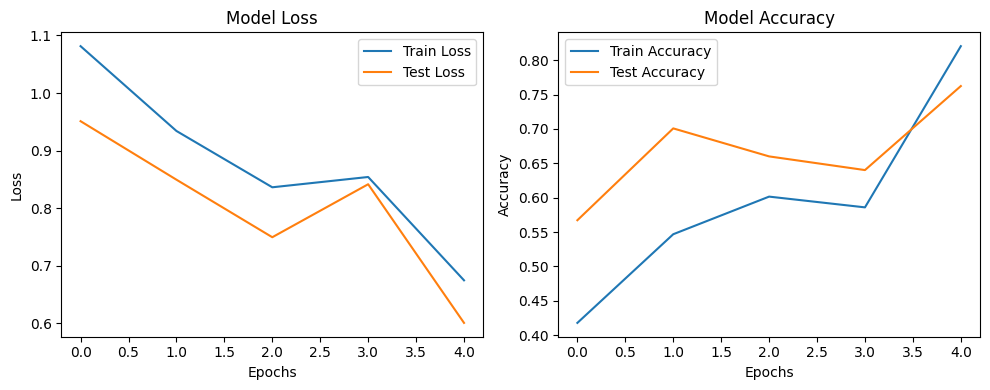

In [69]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(range(len(train_loss)), train_loss, label='Train Loss')
plt.plot(range(len(train_loss)), test_loss, label='Test Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(len(train_acc)), train_acc, label='Train Accuracy')
plt.plot(range(len(train_acc)), test_acc, label='Test Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [73]:
# Setup custom image path
custom_image_path = "data/pizza-dad.jpeg"

In [76]:
from PIL import Image

img = Image.open(custom_image_path)

In [78]:
transforms = torchvision.models.ResNet18_Weights.DEFAULT.transforms()

In [79]:
#-- Predict on image
model.eval()
with torch.inference_mode():
  transformed_image = transforms(img).unsqueeze(dim=0).to(device)
  target_image_pred = model(transformed_image)

In [80]:
target_image_pred_probs = torch.softmax(target_image_pred, dim=1)
target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)

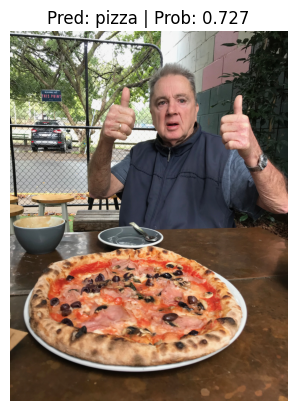

In [81]:
plt.figure()
plt.imshow(img)
plt.title(f"Pred: {train_dataset.classes[target_image_pred_label]} | Prob: {target_image_pred_probs.max():.3f}")
plt.axis(False);